In [1]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
import time

In [ ]:
env = make_vec_env("LunarLander-v3", n_envs=8, seed=42)

model = PPO(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=3e-4,
    n_steps=1000,
    batch_size=64,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    tensorboard_log=None
)

print("Train Start! Background training...")
model.learn(total_timesteps=1_000_000, log_interval=10)

model.save("ppo_lunar_lander_v3")
print("Finished model saved: ppo_lunar_lander_v3.zip")

In [2]:
model = PPO.load("ppo_lunar_lander_v3")

env = gym.make("LunarLander-v3", render_mode="human", enable_wind=False)
obs, _ = env.reset()

history = []
for step in range(1000):
    action, _states = model.predict(obs, deterministic=True)

    obs, reward, terminated, truncated, info = env.step(action)

    history.append({"obs": obs, "action": action, "reward": reward})
    if step % 100 == 0:
        print(f"Obs: {obs.round(2)}\nAct:{action}\nRwd:{reward:.2f}")
    env.render()

    if terminated or truncated:
        print(f"Episode finished after {step+1} steps | Reward: {reward:.2f}")
        print("Episode terminated! Reset...")
        obs, _ = env.reset()
        time.sleep(1)

env.close()

Obs: [ 0.01  1.41  0.68 -0.08 -0.01 -0.11  0.    0.  ]
Act:1
Rwd:0.67
Obs: [ 0.27  0.41 -0.18 -0.28  0.07 -0.05  0.    0.  ]
Act:2
Rwd:1.43
Obs: [ 0.08 -0.01 -0.02  0.02  0.08 -0.08  1.    1.  ]
Act:0
Rwd:1.28
Episode finished after 255 steps | Reward: 100.00
Episode terminated! Reset...
Obs: [-0.06  0.91 -0.02 -0.41 -0.1   0.03  0.    0.  ]
Act:2
Rwd:3.58
Obs: [-0.05  0.16 -0.02 -0.21 -0.01 -0.02  0.    0.  ]
Act:2
Rwd:1.57
Obs: [-0.08 -0.    0.   -0.    0.   -0.    1.    1.  ]
Act:0
Rwd:-0.00
Episode finished after 504 steps | Reward: 100.00
Episode terminated! Reset...
Obs: [-0.    0.49 -0.03 -0.35 -0.01 -0.03  0.    0.  ]
Act:2
Rwd:0.67
Obs: [-0.06 -0.01 -0.02  0.03  0.06 -0.1   1.    1.  ]
Act:0
Rwd:-0.42
Episode finished after 745 steps | Reward: 100.00
Episode terminated! Reset...
Obs: [-0.08  0.85 -0.06 -0.44 -0.11  0.05  0.    0.  ]
Act:3
Rwd:-1.44
Obs: [-0.03  0.1   0.03 -0.24  0.05  0.02  0.    0.  ]
Act:1
Rwd:-2.15
Episode finished after 964 steps | Reward: 100.00
Episode t

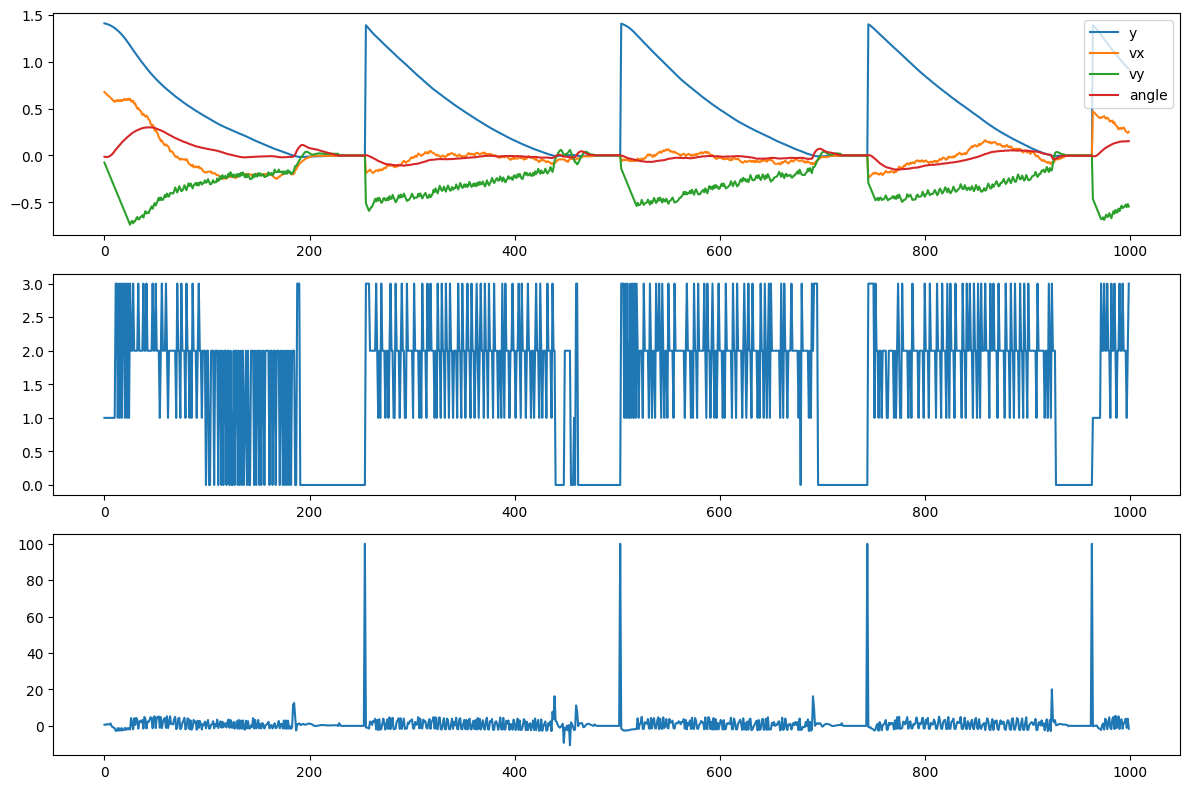

In [5]:
import matplotlib.pyplot as plt

# print([round(val['reward'], 2) for val in history])
# print(history)

fig, axes = plt.subplots(3, 1, figsize=(12, 8))
# x, y, vx, vy, angle, angular vel, left leg, contact, right leg contact
observation = {
    'x': False, 'y': True,
    'vx': True, 'vy': True,
    'angle': True, 'angular velocity': False,
    'left leg contact': False, 'right leg contact': False,
}
obs_names = [
    'x', 'y', 'vx', 'vy',
    'angle', 'angular velocity',
    'left leg contact', 'right leg contact'
]
selected_indices = [i for i, name in enumerate(obs_names) if observation.get(name, False)]
selected_names   = [obs_names[i] for i in selected_indices]

for idx, name in zip(selected_indices, selected_names):
    data = [round(step['obs'][idx], 4) for step in history]
    axes[0].plot(data, label=name, linewidth=1.5)
axes[0].legend(loc="upper right")
axes[1].plot([val['action'] for val in history])
axes[2].plot([round(val['reward'], 2) for val in history])
plt.tight_layout()
plt.show()